# Statistical Analysis

In [7]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 

## Importing the data

In [8]:
control_area = pd.read_csv("data/control_area.csv")
control_cent_x = pd.read_csv("data/control_cent_x.csv")
control_cent_y = pd.read_csv("data/control_cent_y.csv")
mlp_area = pd.read_csv("data/mlp_area.csv")
mlp_cent_x = pd.read_csv("data/mlp_cent_x.csv")
mlp_cent_y = pd.read_csv("data/mlp_cent_y.csv")
mlr_area = pd.read_csv("data/mlr_area.csv")
mlr_cent_x = pd.read_csv("data/mlr_cent_x.csv")
mlr_cent_y = pd.read_csv("data/mlr_cent_y.csv")


## Generating Scatterplots
### Setting up the graphs

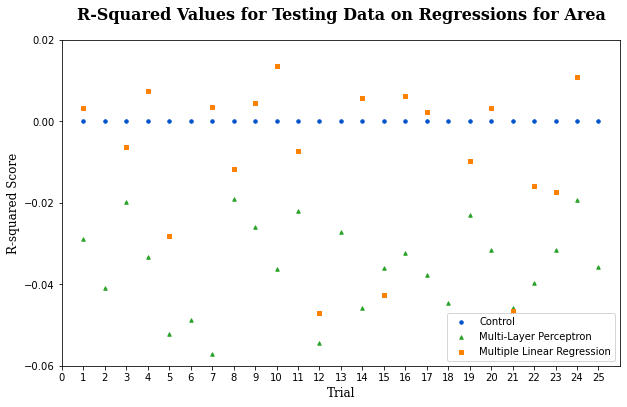

In [9]:
axisFont = {
    'family': 'serif',
    'color':  'black',
    'weight': 'normal',
    'size': 12,
}

titleFont = {
    'family': 'serif',
    'color':  'black',
    'weight': 'bold',
    'size': 16,
}

plt.figure(figsize=(10, 6))

plt.ylim(-.06, .02)
plt.xlim(0, 26)

plt.yticks(np.arange(-.06, .021, step = .02))
plt.xticks(np.arange(0, 26, step = 1))

plt.scatter(x=control_area["trial"], y=control_area['r2_score_test'], s = 12, marker = 'o', c = '#0052cc', label = 'Control')
plt.scatter(x=mlp_area['trial'], y=mlp_area['r2_score_test'], s = 12, marker = '^', c = '#29a329', label = 'Multi-Layer Perceptron')
plt.scatter(x=mlr_area["trial"], y=mlr_area['r2_score_test'], s = 12, marker = 's', c = '#ff8000', label = 'Multiple Linear Regression')

plt.title('R-Squared Values for Testing Data on Regressions for Area', fontdict = titleFont, pad = 20)

plt.xlabel('Trial', fontdict = axisFont)
plt.ylabel('R-squared Score', fontdict = axisFont)

plt.legend(loc = 0)



## Statistical Tests

In [10]:
p_values = {
    'area': {
        'mae_train': stats.f_oneway(control_area['mean_error_train'], mlp_area['mean_error_train'], mlr_area['mean_error_train'])[1],
        'mae_test': stats.f_oneway(control_area['mean_error_test'], mlp_area['mean_error_test'], mlr_area['mean_error_test'])[1],
        'r2_train': stats.f_oneway(control_area['r2_score_train'], mlp_area['r2_score_train'], mlr_area['r2_score_train'])[1],
        'r2_test': stats.f_oneway(control_area['r2_score_test'], mlp_area['r2_score_test'], mlr_area['r2_score_test'])[1]
    },
    'x-coord': {
        'mae_train': stats.f_oneway(control_cent_x['mean_error_train'], mlp_cent_x['mean_error_train'], mlr_cent_x['mean_error_train'])[1],
        'mae_test': stats.f_oneway(control_cent_x['mean_error_test'], mlp_cent_x['mean_error_test'], mlr_cent_x['mean_error_test'])[1],
        'r2_train': stats.f_oneway(control_cent_x['r2_score_train'], mlp_cent_x['r2_score_train'], mlr_cent_x['r2_score_train'])[1],
        'r2_test': stats.f_oneway(control_cent_x['r2_score_test'], mlp_cent_x['r2_score_test'], mlr_cent_x['r2_score_test'])[1]
    },
    'y-coord': {
        'mae_train': stats.f_oneway(control_cent_y['mean_error_train'], mlp_cent_y['mean_error_train'], mlr_cent_y['mean_error_train'])[1],
        'mae_test': stats.f_oneway(control_cent_y['mean_error_test'], mlp_cent_y['mean_error_test'], mlr_cent_y['mean_error_test'])[1],
        'r2_train': stats.f_oneway(control_cent_y['r2_score_train'], mlp_cent_y['r2_score_train'], mlr_cent_y['r2_score_train'])[1],
        'r2_test': stats.f_oneway(control_cent_y['r2_score_test'], mlp_cent_y['r2_score_test'], mlr_cent_y['r2_score_test'])[1]
    }
}

p_values_df = pd.DataFrame(p_values)
p_values_df.to_csv("data/anova_p_values.csv")

In [11]:
f_scores = {
    'area': {
        'mae_train': stats.f_oneway(control_area['mean_error_train'], mlp_area['mean_error_train'], mlr_area['mean_error_train'])[0],
        'mae_test': stats.f_oneway(control_area['mean_error_test'], mlp_area['mean_error_test'], mlr_area['mean_error_test'])[0],
        'r2_train': stats.f_oneway(control_area['r2_score_train'], mlp_area['r2_score_train'], mlr_area['r2_score_train'])[0],
        'r2_test': stats.f_oneway(control_area['r2_score_test'], mlp_area['r2_score_test'], mlr_area['r2_score_test'])[0]
    },
    'x-coord': {
        'mae_train': stats.f_oneway(control_cent_x['mean_error_train'], mlp_cent_x['mean_error_train'], mlr_cent_x['mean_error_train'])[0],
        'mae_test': stats.f_oneway(control_cent_x['mean_error_test'], mlp_cent_x['mean_error_test'], mlr_cent_x['mean_error_test'])[0],
        'r2_train': stats.f_oneway(control_cent_x['r2_score_train'], mlp_cent_x['r2_score_train'], mlr_cent_x['r2_score_train'])[0],
        'r2_test': stats.f_oneway(control_cent_x['r2_score_test'], mlp_cent_x['r2_score_test'], mlr_cent_x['r2_score_test'])[0]
    },
    'y-coord': {
        'mae_train': stats.f_oneway(control_cent_y['mean_error_train'], mlp_cent_y['mean_error_train'], mlr_cent_y['mean_error_train'])[0],
        'mae_test': stats.f_oneway(control_cent_y['mean_error_test'], mlp_cent_y['mean_error_test'], mlr_cent_y['mean_error_test'])[0],
        'r2_train': stats.f_oneway(control_cent_y['r2_score_train'], mlp_cent_y['r2_score_train'], mlr_cent_y['r2_score_train'])[0],
        'r2_test': stats.f_oneway(control_cent_y['r2_score_test'], mlp_cent_y['r2_score_test'], mlr_cent_y['r2_score_test'])[0]
    }
}

f_scores = pd.DataFrame(f_scores)
f_scores.to_csv('data/f_scores.csv')